In [1]:
from sodapy import Socrata
client = Socrata("data.cityofnewyork.us", "Z9djfh6hUgBAIHC7gpZRscVBj")

In [2]:
dataset_id = "e4qk-cpnv"

In [4]:
test = client.get(dataset_id, objectid=1, where="occurrence_day between '7' and '12'")

In [5]:
test

[{u'borough': u'BROOKLYN',
  u'compstat_day': u'11',
  u'compstat_month': u'9',
  u'compstat_year': u'2006',
  u'day_of_week': u'Monday',
  u'identifier': u'f2b0c383',
  u'jurisdiction': u'N.Y. POLICE DEPT',
  u'location_1': {u'coordinates': [-73.9627870699999, 40.6536749960001],
   u'type': u'Point'},
  u'objectid': u'1',
  u'occurrence_date': u'2006-09-11T18:22:00.000',
  u'occurrence_day': u'11',
  u'occurrence_hour': u'18',
  u'occurrence_month': u'Sep',
  u'occurrence_year': u'2006',
  u'offense': u'MURDER & NON-NEGL. MANSLAUGHTE',
  u'offense_classification': u'FELONY',
  u'precinct': u'70',
  u'sector': u'J',
  u'xcoordinate': u'994576',
  u'ycoordinate': u'177427'}]

# Count of every felony in database

In [51]:
count_of_every_felony_response = client.get(dataset_id, select="count(offense)")
count_of_every_felony_response

[{u'count_offense': u'1123465'}]

In [72]:
list_of_offenses_response = client.get(dataset_id, select="offense", group="offense")
list_of_offenses_response

[{u'offense': u'RAPE'},
 {u'offense': u'GRAND LARCENY'},
 {u'offense': u'ROBBERY'},
 {u'offense': u'MURDER & NON-NEGL. MANSLAUGHTE'},
 {u'offense': u'NA'},
 {u'offense': u'FELONY ASSAULT'},
 {u'offense': u'BURGLARY'},
 {u'offense': u'GRAND LARCENY OF MOTOR VEHICLE'}]

In [73]:
list_of_offenses = [x['offense'] for x in list_of_offenses_response]
list_of_offenses

[u'RAPE',
 u'GRAND LARCENY',
 u'ROBBERY',
 u'MURDER & NON-NEGL. MANSLAUGHTE',
 u'NA',
 u'FELONY ASSAULT',
 u'BURGLARY',
 u'GRAND LARCENY OF MOTOR VEHICLE']

In [54]:
count_of_every_felony = int(count_of_every_felony_response[0]['count_offense'])
count_of_every_felony

1123465

# Felonies by offense type

In [58]:
offense_count = client.get(dataset_id, select="offense, count(offense)", group="offense")
offense_count

[{u'count_offense': u'13779', u'offense': u'RAPE'},
 {u'count_offense': u'428993', u'offense': u'GRAND LARCENY'},
 {u'count_offense': u'198744', u'offense': u'ROBBERY'},
 {u'count_offense': u'4574', u'offense': u'MURDER & NON-NEGL. MANSLAUGHTE'},
 {u'count_offense': u'1', u'offense': u'NA'},
 {u'count_offense': u'184042', u'offense': u'FELONY ASSAULT'},
 {u'count_offense': u'191369', u'offense': u'BURGLARY'},
 {u'count_offense': u'101963', u'offense': u'GRAND LARCENY OF MOTOR VEHICLE'}]

In [19]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
[int(x['count_offense']) for x in offense_count]

[13779, 428993, 198744, 4574, 1, 184042, 191369, 101963]

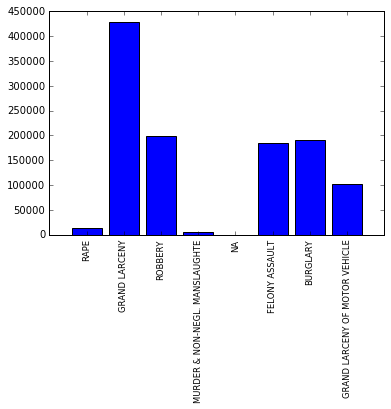

In [30]:
plt.bar(range(0, len(offense_count)), [int(x['count_offense']) for x in offense_count], align='center')
plt.xticks(range(len([int(x['count_offense']) for x in offense_count])), [x['offense'] for x in offense_count], size='small', rotation=90)

plt.show()

# Offenses ratio by borough
## First we get probability of each offense  - P(Offense)

In [82]:
from __future__ import division
def probability_of_felony(offense_type):
    number_of_crimes = int([x['count_offense'] for x in offense_count if x['offense'] == offense_type][0])
    return number_of_crimes / count_of_every_felony

In [83]:
offense_ratio = {}
for offense in list_of_offenses:
    offense_ratio[offense] = probability_of_felony(offense)
offense_ratio

{u'BURGLARY': 0.17033819478132384,
 u'FELONY ASSAULT': 0.16381640727570507,
 u'GRAND LARCENY': 0.38184812165933074,
 u'GRAND LARCENY OF MOTOR VEHICLE': 0.09075761149657532,
 u'MURDER & NON-NEGL. MANSLAUGHTE': 0.004071332885314629,
 u'NA': 8.901033855082268e-07,
 u'RAPE': 0.012264734548917857,
 u'ROBBERY': 0.176902707249447}

## P(offense|borough)

In [92]:
offense_count_by_borough = client.get(dataset_id, select="borough, count(offense)", group="borough")
offense_count_by_borough = [x for x in offense_count_by_borough if 'borough' in x]
offense_count_by_borough = [x for x in offense_count_by_borough if x['borough'] not in ('NA', '(null)', None)]
offense_count_by_borough

[{u'borough': u'QUEENS', u'count_offense': u'243802'},
 {u'borough': u'MANHATTAN', u'count_offense': u'287812'},
 {u'borough': u'BRONX', u'count_offense': u'207578'},
 {u'borough': u'BROOKLYN', u'count_offense': u'351517'},
 {u'borough': u'STATEN ISLAND', u'count_offense': u'32668'}]

In [93]:
offense_count_by_borough_and_offense = client.get(dataset_id, select="offense, borough, count(offense)", group="borough, offense")
offense_count_by_borough_and_offense = [x for x in offense_count_by_borough_and_offense if 'borough' in x]
offense_count_by_borough_and_offense = [x for x in offense_count_by_borough_and_offense if x['borough'] not in ('NA', '(null)', None)]
offense_count_by_borough_and_offense

[{u'borough': u'MANHATTAN',
  u'count_offense': u'35125',
  u'offense': u'BURGLARY'},
 {u'borough': u'QUEENS', u'count_offense': u'40822', u'offense': u'ROBBERY'},
 {u'borough': u'BRONX',
  u'count_offense': u'1170',
  u'offense': u'MURDER & NON-NEGL. MANSLAUGHTE'},
 {u'borough': u'QUEENS',
  u'count_offense': u'35260',
  u'offense': u'FELONY ASSAULT'},
 {u'borough': u'BRONX',
  u'count_offense': u'22114',
  u'offense': u'GRAND LARCENY OF MOTOR VEHICLE'},
 {u'borough': u'BROOKLYN', u'count_offense': u'69671', u'offense': u'ROBBERY'},
 {u'borough': u'BROOKLYN',
  u'count_offense': u'62450',
  u'offense': u'FELONY ASSAULT'},
 {u'borough': u'BRONX', u'count_offense': u'3018', u'offense': u'RAPE'},
 {u'borough': u'BRONX',
  u'count_offense': u'54537',
  u'offense': u'GRAND LARCENY'},
 {u'borough': u'BRONX', u'count_offense': u'33633', u'offense': u'BURGLARY'},
 {u'borough': u'MANHATTAN',
  u'count_offense': u'615',
  u'offense': u'MURDER & NON-NEGL. MANSLAUGHTE'},
 {u'borough': u'STATEN IS

In [97]:
boroughs = client.get(dataset_id, select="borough", group="borough")
boroughs = [x['borough'] for x in boroughs[1:]]
boroughs = [x for x in boroughs if x not in ('NA', '(null)', None)]
boroughs

[u'QUEENS', u'MANHATTAN', u'BRONX', u'BROOKLYN', u'STATEN ISLAND']

In [101]:
def probability_of_offense_by_borough(offense, borough):
    all_offenses_in_borough = sum([int(x['count_offense']) for x in offense_count_by_borough_and_offense if x['borough'] == borough])
    number_of_specific_offense = sum([int(x['count_offense']) for x in offense_count_by_borough_and_offense 
                                   if (x['borough'] == borough 
                                   and x['offense'] == offense)])
    return number_of_specific_offense / all_offenses_in_borough

In [104]:
offense_ratio_by_borough = {}
for borough in boroughs:
    offense_ratio_by_borough[borough] = []
    temp_dict = {}
    for offense in list_of_offenses:
        temp_dict[offense] = probability_of_offense_by_borough(offense, borough)
    offense_ratio_by_borough[borough].append(temp_dict)
offense_ratio_by_borough

{u'BRONX': [{u'BURGLARY': 0.16202584088872615,
   u'FELONY ASSAULT': 0.2303086068851227,
   u'GRAND LARCENY': 0.26273015444796655,
   u'GRAND LARCENY OF MOTOR VEHICLE': 0.10653344766786461,
   u'MURDER & NON-NEGL. MANSLAUGHTE': 0.005636435460405246,
   u'NA': 0.0,
   u'RAPE': 0.014539113008122249,
   u'ROBBERY': 0.2182264016417925}],
 u'BROOKLYN': [{u'BURGLARY': 0.18762677196266467,
   u'FELONY ASSAULT': 0.17765854851970175,
   u'GRAND LARCENY': 0.325455098899911,
   u'GRAND LARCENY OF MOTOR VEHICLE': 0.09430269375307596,
   u'MURDER & NON-NEGL. MANSLAUGHTE': 0.005100749039164535,
   u'NA': 0.0,
   u'RAPE': 0.011655197330427832,
   u'ROBBERY': 0.1982009404950543}],
 u'MANHATTAN': [{u'BURGLARY': 0.12204147151612858,
   u'FELONY ASSAULT': 0.11471029699943018,
   u'GRAND LARCENY': 0.5804413992467305,
   u'GRAND LARCENY OF MOTOR VEHICLE': 0.03666629605436882,
   u'MURDER & NON-NEGL. MANSLAUGHTE': 0.002136811529748586,
   u'NA': 0.0,
   u'RAPE': 0.010218475949578197,
   u'ROBBERY': 0.133785

# P(offense|borough)/P(offense)

In [105]:
def probability_of_offense_by_borough_compared_to_other_boroughs(offense, borough):
    probability = offense_ratio_by_borough[borough][0][offense]
    return probability / offense_ratio[offense]

In [106]:
offense_by_borough_compared_to_other_boroughs = {}
for borough in boroughs:
    offense_by_borough_compared_to_other_boroughs[borough] = []
    temp_dict = {}
    for offense in list_of_offenses:
        temp_dict[offense] = probability_of_offense_by_borough_compared_to_other_boroughs(offense, borough)
    offense_by_borough_compared_to_other_boroughs[borough].append(temp_dict)
offense_by_borough_compared_to_other_boroughs

{u'BRONX': [{u'BURGLARY': 0.9512008806758291,
   u'FELONY ASSAULT': 1.4058946274991273,
   u'GRAND LARCENY': 0.6880488328874474,
   u'GRAND LARCENY OF MOTOR VEHICLE': 1.1738238359422293,
   u'MURDER & NON-NEGL. MANSLAUGHTE': 1.3844201933808875,
   u'NA': 0.0,
   u'RAPE': 1.185440496093335,
   u'ROBBERY': 1.2335956019829348}],
 u'BROOKLYN': [{u'BURGLARY': 1.1014955994076108,
   u'FELONY ASSAULT': 1.084497892941213,
   u'GRAND LARCENY': 0.8523155685188067,
   u'GRAND LARCENY OF MOTOR VEHICLE': 1.039060991117361,
   u'MURDER & NON-NEGL. MANSLAUGHTE': 1.252844997657408,
   u'NA': 0.0,
   u'RAPE': 0.950301637914878,
   u'ROBBERY': 1.1203951797954967}],
 u'MANHATTAN': [{u'BURGLARY': 0.716465685648498,
   u'FELONY ASSAULT': 0.7002369231939711,
   u'GRAND LARCENY': 1.5200844689883708,
   u'GRAND LARCENY OF MOTOR VEHICLE': 0.4040024351649272,
   u'MURDER & NON-NEGL. MANSLAUGHTE': 0.5248432368318747,
   u'NA': 0.0,
   u'RAPE': 0.8331591612375985,
   u'ROBBERY': 0.7562645636359153}],
 u'QUEENS': 

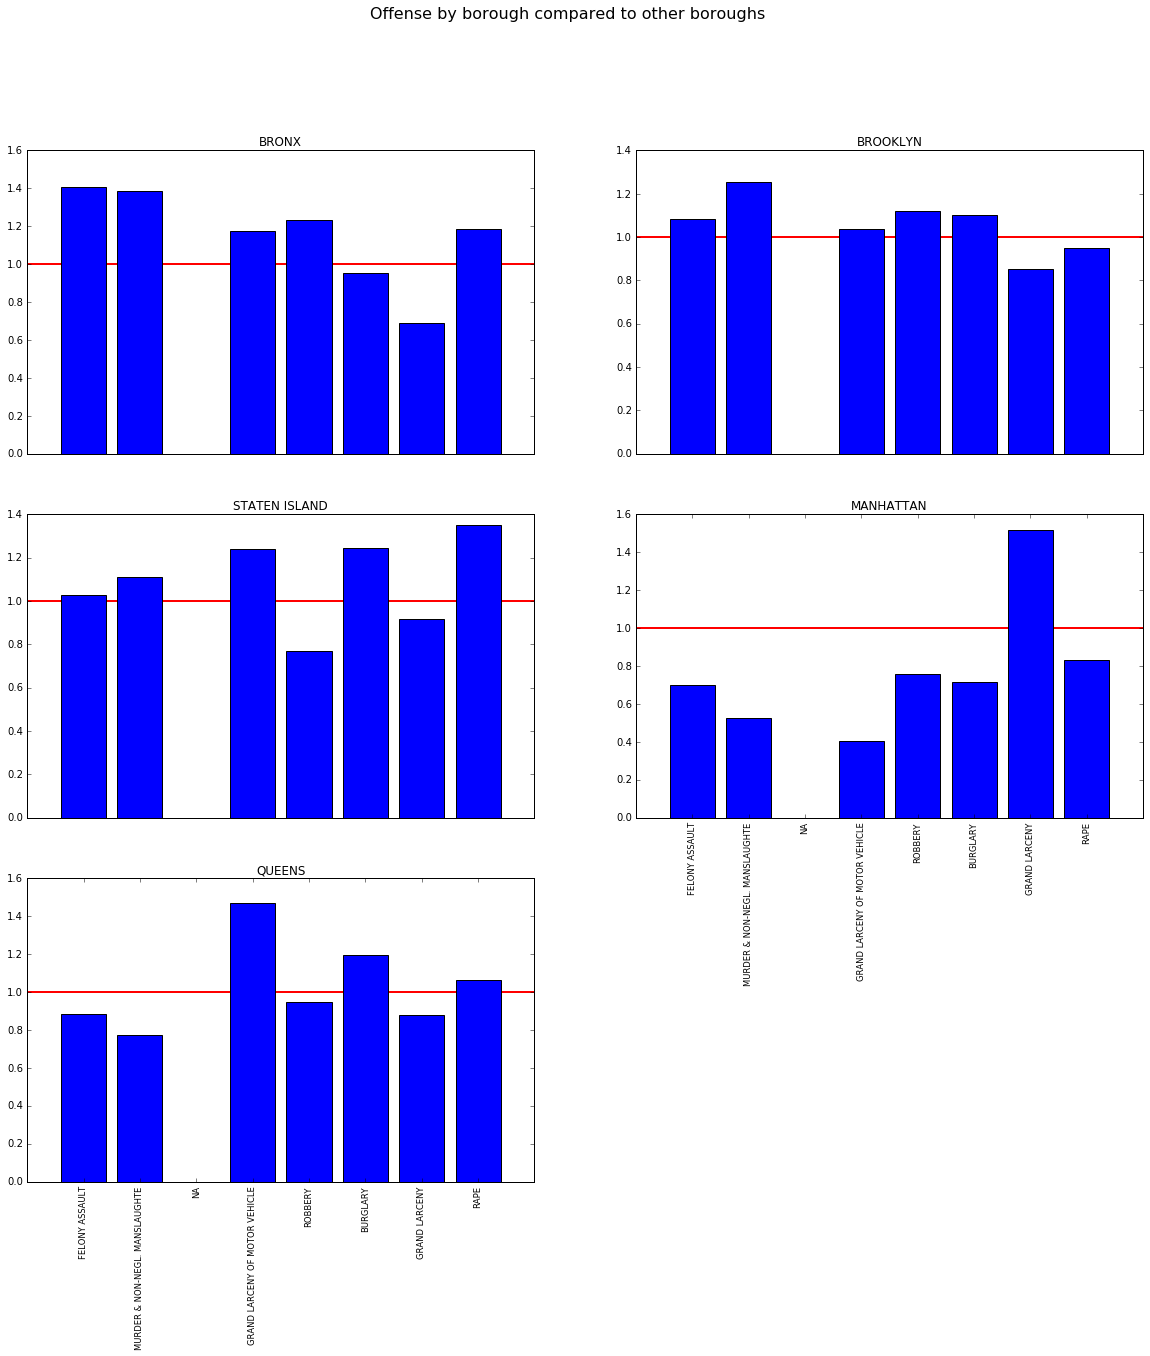

In [118]:
width = 20
height = 25
offense_by_borough_compared_to_other_boroughs_figure = plt.figure(figsize=(width, height))
offense_by_borough_compared_to_other_boroughs_figure.suptitle("Offense by borough compared to other boroughs", fontsize=16)

item = 1
for key, value in offense_by_borough_compared_to_other_boroughs.iteritems():
    ax = plt.subplot(len(list_of_offenses)/2, 2, item)
    ax.set_title(key)
    plt.bar(range(0, len(value[0].keys())), value[0].values(), align='center')
    if item == (len(offense_by_borough_compared_to_other_boroughs)-1) or item == len(offense_by_borough_compared_to_other_boroughs):
        plt.xticks(range(len(value[0])), value[0].keys(), size='small', rotation=90)
    else:
        ax.axes.get_xaxis().set_ticks([])
        
    ax.axhline(y=1,xmin=0,xmax=3,c="red",linewidth=2,zorder=0)
    item = item + 1

plt.show()

# Plot up heatmap

In [6]:
coordinates = client.get(dataset_id, select="location_1")
coordinates = [x['location_1']['coordinates'] for x in coordinates]
coordinates

[[-73.9883732929999, 40.6227027620001],
 [-73.955861904, 40.8037530600001],
 [-73.9918594329999, 40.688874254],
 [-73.9220463899999, 40.6674141890001],
 [-73.878495425, 40.6668988440001],
 [-73.7324430589999, 40.7284698170001],
 [-73.906195082, 40.671025464],
 [-73.749976261, 40.6029515910001],
 [-73.792611904, 40.707047475],
 [-73.971924858, 40.7522284],
 [-73.9180833619999, 40.697963515],
 [-73.9523962929999, 40.664606373],
 [-73.8773972609999, 40.82506399],
 [-73.954335162, 40.8231164790001],
 [-73.925553911, 40.838449934],
 [-73.9151616139999, 40.6757699120001],
 [-73.864413554, 40.839914838],
 [-73.954736461, 40.7430801680001],
 [-73.854202605, 40.8899712210001],
 [-73.859000051, 40.838052921],
 [-73.977839495, 40.657491384],
 [-74.008457521, 40.634837755],
 [-73.867785667, 40.8870891880001],
 [-73.9412148439999, 40.6607063600001],
 [-73.799467341, 40.677462695],
 [-73.758672201, 40.762642402],
 [-73.878993913, 40.721959482],
 [-73.830659498, 40.70317648],
 [-73.910971382, 40.6630

In [4]:
geo_data_for_plotting = {"lat": [float(line[1]) for line in coordinates],
                         "lon": [float(line[0]) for line in coordinates]}
#geo_data_for_plotting

In [9]:
max_lat = 40.908323399
min_lat = 40.5127551031
max_lon = -73.738861084
min_lon = -74.2442321777

In [13]:
import geoplotlib
from geoplotlib.utils import BoundingBox, DataAccessObject
import numpy as np

geo_data_access_object = DataAccessObject(geo_data_for_plotting)
geoplotlib.dot(geo_data_access_object)

bbox = BoundingBox( north=max_lat, 
                    west=min_lon, 
                    south=min_lat, 
                   east=max_lon)

geoplotlib.set_bbox(bbox)

geoplotlib.inline()